In [ ]:
#import locale
#locale.getpreferredencoding = lambda:"UTF-8"
#locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

!pip install textattack
!pip3 install pygobject
!pip3 install gTTS pyttsx3 playsound
!pip3 install python-vlc
!pip3 install SpeechRecognition pydub
!pip install --upgrade smart_open

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pycairo-1.23.0.tar.gz (344 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pycairo (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pycairo
Failed to build pycairo
ERROR: Could not build wheels for pycairo, which is required to install pyproject.toml-based projects
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-pyth

In [ ]:
import re
import base64
import requests
from sys import argv, stdin
import os
import yaml
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from textattack.augmentation import WordNetAugmenter
import pickle

from gtts import gTTS
import IPython
import speech_recognition as sr
from pydub import AudioSegment

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras import layers, activations, models, preprocessing, utils
from keras.utils import pad_sequences
from keras.layers import Input,Embedding,Bidirectional,LSTM,Dense,Concatenate
from keras.models import Model
tf.keras.utils.set_random_seed(1234)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

import nltk
nltk.download('stopwords')

import csv
import random
import unicodedata
import codecs
import itertools
from __future__ import absolute_import, division, print_function, unicode_literals

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
mytext = 'Can I get a green tea?'
language = 'en'
  
# Passing the text and language to the engine, 
# here we have marked slow=False. Which tells the module that the converted audio should have a high speed
myobj = gTTS(text=mytext, lang=language, slow=False)
  
# Saving the converted audio in a wav file 
myobj.save("order.mp3")
 
# Playing the audio
IPython.display.Audio('order.mp3')

In [ ]:
# ensure audio file is in wav format for GSR                                                                         
src = "order.mp3"
dst = "order.wav"

                                                            
sound = AudioSegment.from_mp3(src)
sound.export(dst, format="wav")

<_io.BufferedRandom name='order.wav'>

In [ ]:
# initialize the recognizer
r = sr.Recognizer()

# open the audio file
with sr.AudioFile(dst) as source:
    try:            
          audio_data = r.record(source)
          text = r.recognize_google(audio_data, language='en')
          print(text)

    # If google could not understand the audio
    except sr.UnknownValueError:
          print("------GR couldn't understand:", dst, "but was able to convert:", text)

    # If the results cannot be requested from Google
    # Probably an internet connection error.
    except sr.RequestError as e:
          print("Could not request results.") 

can I get a green tea


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# barista file path

path_1 = '/content/drive/My Drive/ColabNotebooks/data298/content/1k/barista-task1-greetings-trn.txt'
path_2 ='/content/drive/My Drive/ColabNotebooks/data298/content/1k/barista-task2-order-drink-no-greetings-trn.txt'
path_3 = '/content/drive/My Drive/ColabNotebooks/data298/content/1k/barista-task3-order-drink-no-greetings-changes-trn.txt'
path_4 = '/content/drive/My Drive/ColabNotebooks/data298/content/1k/barista-task4-order-all-no-greetings-trn.txt'
path_5 = '/content/drive/My Drive/ColabNotebooks/data298/content/1k/barista-task5-order-all-no-greetings-changes-trn.txt'
path_6 = '/content/drive/My Drive/ColabNotebooks/data298/content/1k/barista-task6-order-all-with-greetings-trn.txt'
path_7 = '/content/drive/My Drive/ColabNotebooks/data298/content/1k/barista-task7-order-all-with-greetings-changes-trn.txt'

Mounted at /content/drive


In [ ]:
# function reads text file
def parse_candidates(filename):
    with open(filename, 'r') as f:
        return [' '.join(line.strip().split(' ')[1:]) for line in f]

# barista

text_1 = parse_candidates(path_1)
text_2 = parse_candidates(path_2)
text_3 = parse_candidates(path_3)
text_4 = parse_candidates(path_4)
text_5 = parse_candidates(path_5)
text_6 = parse_candidates(path_6)
text_7 = parse_candidates(path_7)
all_barista = text_1 + text_2 + text_3 + text_4 + text_5 + text_6 + text_7
all_barista[4999:5005] # sample

['',
 'A mocha .\tWhich size ?',
 'Medium .\tWould you like anything else with that ?',
 'Just the drink .\tSo that would be a medium mocha . Is that right ?',
 'Sounds good !\tYour order will be ready at the next counter .',
 '']

In [ ]:
def parse_dialogs(filename):
    q = []
    a = []

    for line in filename:
        if line.strip() == '':
            continue
        else:
            splitted = line.strip().split('\t')
            if len(splitted) == 2:
                user_utt, bot_utt = splitted
                q.append(user_utt)
                a.append(bot_utt)
            else:
                continue

    return q, a

q1, a1 = parse_dialogs(text_1)
q2, a2 = parse_dialogs(text_2)
q3, a3 = parse_dialogs(text_3)
q4, a4 = parse_dialogs(text_4)
q5, a5 = parse_dialogs(text_5)
q6, a6 = parse_dialogs(text_6)
q7, a7 = parse_dialogs(text_7)

questions = q1+q2+q3+q4+q5+q6+q7
answers = a1+a2+a3+a4+a5+a6+a7
print(len(questions), len(answers))

36265 36265


In [ ]:
questions[6000:6012] # sample

['Could I get a black tea , please ?',
 'Large cup .',
 'No , that is it .',
 'Sounds good !',
 'A hot chocolate , please .',
 'Small would do .',
 'Just the drink , please .',
 'Yeap .',
 'A black tea .',
 'Medium , thank you !',
 'That would be it .',
 'Yes !']

In [ ]:
answers[6000:6012] # sample

['Which size ?',
 'Would you like anything else with that ?',
 'So that would be a large black tea . Is that right ?',
 'Your order will be ready at the next counter .',
 'Which size ?',
 'Would you like anything else with that ?',
 'So that would be a small hot chocolate . Is that right ?',
 'Your order will be ready at the next counter .',
 'Which size ?',
 'Would you like anything else with that ?',
 'So that would be a medium black tea . Is that right ?',
 'Your order will be ready at the next counter .']

In [ ]:
barista = {'Question': questions, 'Answer': answers}
barista_df = pd.DataFrame(barista)

print(barista_df.iloc[5000:5007,:])

                       Question  \
5000  I would like a cordusio .   
5001          Medium would do .   
5002              No , thanks .   
5003                     Yeah .   
5004      A caramel macchiato .   
5005                Small cup .   
5006         That would be it .   

                                                 Answer  
5000                                       Which size ?  
5001           Would you like anything else with that ?  
5002  So that would be a medium cordusio . Is that r...  
5003     Your order will be ready at the next counter .  
5004                                       Which size ?  
5005           Would you like anything else with that ?  
5006  So that would be a small caramel macchiato . I...  


In [ ]:
print(barista_df.shape)
print("="*60)
print(barista_df.info())
print("="*60)
barista_df.describe()

(36265, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36265 entries, 0 to 36264
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  36265 non-null  object
 1   Answer    36265 non-null  object
dtypes: object(2)
memory usage: 566.8+ KB
None


,Question,Answer
count,36265,36265
unique,1401,1792
top,Sounds good !,Which size ?
freq,911,6000


In [ ]:
barista_df

,Question,Answer
0,Hey !,Hello ! Which drink can I get for you ?
1,That is correct .,Great ! Can I take your name ? api_call getCus...
2,Keri Russell .,"Your order will be ready at the next counter ,..."
3,Thank you !,Have a nice day !
4,Hello !,Hello ! Which drink can I get for you ?
...,...,...
36260,Medium would do .,Would you like anything else with that ?
36261,I would like a blueberry oatmeal .,So that would be a medium americano and a blue...
36262,Sounds good !,Great ! Can I take your name ? api_call getCus...
36263,It is Johnny Depp .,"Your order will be ready at the next counter ,..."


In [ ]:
# text preprocessing - lowercase + remove char not english or numbers
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  
                "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", 
                "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I would", "I'd've": "I would have", 
                "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  
                "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", 
                "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not",
                "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", 
                "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", 
                "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", 
                "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is",
                "that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", 
                "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", 
                "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
                "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", 
                "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", 
                "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", 
                "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                "you'll've": "you will have", "you're": "you are", "you've": "you have"}

#remove_stop = True for questions
#remove_stop = False for answers
def preprocess_text(text,remove_stop):
    text = text.lower()
    text = ' '.join([contractions[word] if word in contractions else word for word in text.split()])
    text = re.sub(r'[^a-zA-Z0-9]',' ',text)
    if remove_stop == True:
        text = ' '.join([word for word in text.split() if word not in stop_words])
    text = ' '.join([word for word in text.split()])
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
barista_df.Question = barista_df.Question.apply(preprocess_text,remove_stop=False)
barista_df.Answer = barista_df.Answer.apply(preprocess_text,remove_stop=False)
barista_df

,Question,Answer
0,hey,hello which drink can i get for you
1,that is correct,great can i take your name api call getcustome...
2,keri russell,your order will be ready at the next counter keri
3,thank you,have a nice day
4,hello,hello which drink can i get for you
...,...,...
36260,medium would do,would you like anything else with that
36261,i would like a blueberry oatmeal,so that would be a medium americano and a blue...
36262,sounds good,great can i take your name api call getcustome...
36263,it is johnny depp,your order will be ready at the next counter j...


In [ ]:
Mlines = open('/content/drive/My Drive/ColabNotebooks/data298/content/1k/movie_lines.txt',encoding = 'utf-8', errors = 'ignore').read().split('\n')
Mconversations = open('/content/drive/My Drive/ColabNotebooks/data298/content/1k/movie_conversations.txt',encoding = 'utf-8', errors = 'ignore').read().split('\n')

In [ ]:
Mlines

['L1045 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ They do not!',
 'L1044 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ They do to!',
 'L985 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ I hope so.',
 'L984 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ She okay?',
 "L925 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Let's go.",
 'L924 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ Wow',
 "L872 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Okay -- you're gonna need to learn how to lie.",
 'L871 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ No',
 'L870 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ I\'m kidding.  You know how sometimes you just become this "persona"?  And you don\'t know how to quit?',
 'L869 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Like my fear of wearing pastels?',
 'L868 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ The "real you".',
 'L867 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ What good stuff?',
 "L866 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ I figured yo

In [ ]:
Mconversations

["u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L194', 'L195', 'L196', 'L197']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L198', 'L199']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L200', 'L201', 'L202', 'L203']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L204', 'L205', 'L206']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L207', 'L208']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L271', 'L272', 'L273', 'L274', 'L275']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L276', 'L277']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L280', 'L281']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L363', 'L364']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L365', 'L366']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L367', 'L368']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L401', 'L402', 'L403']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L404', 'L405', 'L406', 'L407']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L575', 'L576']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L577', 'L578']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L662', 'L663']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L693', 'L69

In [ ]:
# visualizing some lines
with open('/content/drive/My Drive/ColabNotebooks/data298/content/1k/movie_lines.txt',encoding = 'utf-8', errors = 'ignore') as file:
    lines = file.readlines()
for line in lines[:10]:
    print(line.strip())

L1045 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ They do not!
L1044 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ They do to!
L985 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ I hope so.
L984 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ She okay?
L925 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Let's go.
L924 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ Wow
L872 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Okay -- you're gonna need to learn how to lie.
L871 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ No
L870 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ I'm kidding.  You know how sometimes you just become this "persona"?  And you don't know how to quit?
L869 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Like my fear of wearing pastels?


In [ ]:
# splits each line of the file into a dictionary of fields(lineID,characterID,movieID,character,text)
line_fields = ["lineID","characterID","movieID","character","text"]
lines = {}

with open('/content/drive/My Drive/ColabNotebooks/data298/content/1k/movie_lines.txt', 'r', encoding='iso-8859-1') as f:
    for line in f:
        values = line.split(" +++$+++ ")
        # Extract fields
        lineObj = {}
        for i, field in enumerate(line_fields):
            lineObj[field] = values[i]
        lines[lineObj['lineID']] = lineObj

In [ ]:
# Grouping fields of lines from the above loaded lines into conversation based on "movie_conversations.txt"

conv_fields = ["character1ID", "character2ID", "movieID", "utteranceIDs"]
conversations = []

with open('/content/drive/My Drive/ColabNotebooks/data298/content/1k/movie_conversations.txt', 'r', encoding='iso-8859-1') as f:
    for line in f:
        values = line.split(" +++$+++ ")
        # Extract fields
        convObj = {}
        for i, field in enumerate(conv_fields):
            convObj[field] = values[i]
        lineIds = eval(convObj["utteranceIDs"])
        # Reassemble lines
        convObj["lines"] = []
        for lineId in lineIds:
            convObj["lines"].append(lines[lineId])
        conversations.append(convObj)

In [ ]:
# Extracts pairs of sentences from conversations
qa_pairs = []
for conversation in conversations:
    # Iterate over all the lines of the conversation
    for i in range(len(conversation["lines"]) - 1):  # We ignore the last line (no answer for it)
        inputLine = conversation["lines"][i]["text"].strip()
        targetLine = conversation["lines"][i+1]["text"].strip()
  
        # Filter wrong samples (if one of the lists is empty)
        if inputLine and targetLine:
            qa_pairs.append([inputLine, targetLine])

In [ ]:
# Define path to new file
datafile = os.path.join('/content/drive/My Drive/ColabNotebooks/data298/content/1k', "formatted_movie_lines.txt")

delimiter = '\t'
# Unescape the delimiter
delimiter = str(codecs.decode(delimiter, "unicode_escape"))

# Writing the conversational pairs into new csv file
print("\nWriting newly formatted file...")
with open(datafile, 'w', encoding='utf-8') as outputfile:
    writer = csv.writer(outputfile, delimiter=delimiter)
    for pair in qa_pairs:
        writer.writerow(pair)


Writing newly formatted file...


In [ ]:
# visualizing some lines
with open(datafile,'rb') as file:
    lines = file.readlines()
for line in lines[:10]:
    print(line.strip())

b"Can we make this quick?  Roxanne Korrine and Andrew Barrett are having an incredibly horrendous public break- up on the quad.  Again.\tWell, I thought we'd start with pronunciation, if that's okay with you."
b"Well, I thought we'd start with pronunciation, if that's okay with you.\tNot the hacking and gagging and spitting part.  Please."
b"Not the hacking and gagging and spitting part.  Please.\tOkay... then how 'bout we try out some French cuisine.  Saturday?  Night?"
b"You're asking me out.  That's so cute. What's your name again?\tForget it."
b"No, no, it's my fault -- we didn't have a proper introduction ---\tCameron."
b"Cameron.\tThe thing is, Cameron -- I'm at the mercy of a particularly hideous breed of loser.  My sister.  I can't date until she does."
b"The thing is, Cameron -- I'm at the mercy of a particularly hideous breed of loser.  My sister.  I can't date until she does.\tSeems like she could get a date easy enough..."
b'Why?\tUnsolved mystery.  She used to be really po

In [ ]:
# Default word tokens
PAD_token = 0  # Used for padding short sentences
SOS_token = 1  # Start-of-sentence token
EOS_token = 2  # End-of-sentence token

class Vocabulary:
    def __init__(self, name):
        self.name = name
        self.trimmed = False
        self.word2index = {}
        self.word2count = {}
        self.index2word = {PAD_token: "PAD", SOS_token: "SOS", EOS_token: "EOS"}
        self.num_words = 3  # Counting SOS, EOS, PAD

    def addSentence(self, sentence):
        for word in sentence.split(' '):
            self.addWord(word)

    def addWord(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.num_words
            self.word2count[word] = 1
            self.index2word[self.num_words] = word
            self.num_words += 1
        else:
            self.word2count[word] += 1

    # Removing words below a certain count threshold
    def trim(self, min_count):
        if self.trimmed:
            return
        self.trimmed = True

        keep_words = []

        for k, v in self.word2count.items():
            if v >= min_count:
                keep_words.append(k)

        print('keep_words {} / {} = {:.4f}'.format(
            len(keep_words), len(self.word2index), len(keep_words) / len(self.word2index)
        ))

        # Reinitializing dictionaries
        self.word2index = {}
        self.word2count = {}
        self.index2word = {PAD_token: "PAD", SOS_token: "SOS", EOS_token: "EOS"}
        self.num_words = 3 # Counting default tokens

        for word in keep_words:
            self.addWord(word)

In [ ]:
# Turn a Unicode string to plain ASCII
def unicodeToAscii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn')

# Testing the function - eliminates special characters
unicodeToAscii("cédillea")

'cedillea'

In [ ]:
# Lowercase, trim, and remove non-letter characters
def normalizeString(s):
    
    # Unicode string to plain ASCII
    s = unicodeToAscii(s.lower().strip())
    
    # Replacing any .!? by a whitespace plus the character
    # ' \1' means the first bracketed group
    # r is not to consider ' \1' as an individual character
    # r in r" \1" is to esccape the backslash
    s = re.sub(r"([.!?])", r" \1", s)
    
    # Removing any character that is not a sequence of lower or upper case letters
    # + means one or more
    s = re.sub(r"[^a-zA-Z.!?]+", r" ", s)
    
    # Removing a sequence of whitespace characters
    s = re.sub(r"\s+", r" ", s).strip()
    
    return s

# Testing the function
normalizeString("abc1103!?.     abcde' abc?")

'abc ! ? . abcde abc ?'

In [ ]:
datafile = os.path.join('/content/drive/My Drive/ColabNotebooks/data298/content/1k', "formatted_movie_lines.txt")

# Reading the file and splitting into lines
print("Reading and processing file....Please Wait")
lines = open(datafile,encoding = 'utf-8').read().strip().split('\n')

# Splitting every line into pairs and normalizing them
pairs = [[normalizeString(s) for s in pair.split('\t')] for pair in lines]

print("Done Reading!!!")
voc = Vocabulary('/content/drive/My Drive/ColabNotebooks/data298/content/1k')

Reading and processing file....Please Wait
Done Reading!!!


In [ ]:
MAX_LENGTH = 10  # Maximum sentence length to consider

# Returns True iff both sentences in a pair 'p' are under the MAX_LENGTH threshold
def filterPair(p):
    # Input sequences need to preserve the last word for EOS token
    if p:
        return len(p[0].split(' ')) < MAX_LENGTH and len(p[1].split(' ')) < MAX_LENGTH
    else:
        return False

# Filter pairs using filterPair condition
def filterPairs(pairs):
    pairs = [pair for pair in pairs if pair != ['']]
    return [pair for pair in pairs if filterPair(pair)]

print("There are {} pairs/conversations in the dataset".format(len(pairs)))
pairs = filterPairs(pairs)
print("After filtering there are {} pairs/conversations".format(len(pairs)))

for pair in pairs:
        voc.addSentence(pair[0])
        voc.addSentence(pair[1])

print("Counted words:", voc.num_words)
for pair in pairs[:10]:
    print(pair)

There are 221282 pairs/conversations in the dataset
After filtering there are 64271 pairs/conversations
Counted words: 18008
['there .', 'where ?']
['you have my word . as a gentleman', 'you re sweet .']
['hi .', 'looks like things worked out tonight huh ?']
['you know chastity ?', 'i believe we share an art instructor']
['have fun tonight ?', 'tons']
['well no . . .', 'then that s all you had to say .']
['then that s all you had to say .', 'but']
['but', 'you always been this selfish ?']
['do you listen to this crap ?', 'what crap ?']
['what good stuff ?', 'the real you .']


In [ ]:
MIN_COUNT = 3    # Minimum word count threshold for trimming

def trimRareWords(voc, pairs, MIN_COUNT):
    # Trim words used under the MIN_COUNT from the voc
    voc.trim(MIN_COUNT)
    # Filter out pairs with trimmed words
    keep_pairs = []
    for pair in pairs:
        input_sentence = pair[0]
        output_sentence = pair[1]
        keep_input = True
        keep_output = True
        # Check input sentence
        for word in input_sentence.split(' '):
            if word not in voc.word2index:
                keep_input = False
                break
        # Check output sentence
        for word in output_sentence.split(' '):
            if word not in voc.word2index:
                keep_output = False
                break

        # Only keep pairs that do not contain trimmed word(s) in their input or output sentence
        if keep_input and keep_output:
            keep_pairs.append(pair)

    print("Trimmed from {} pairs to {}, {:.4f} of total".format(len(pairs), len(keep_pairs), len(keep_pairs) / len(pairs)))
    return keep_pairs


# Trim voc and pairs
pairs = trimRareWords(voc, pairs, MIN_COUNT)

pairs[:10]

keep_words 7823 / 18005 = 0.4345
Trimmed from 64271 pairs to 53165, 0.8272 of total


[['there .', 'where ?'],
 ['you have my word . as a gentleman', 'you re sweet .'],
 ['hi .', 'looks like things worked out tonight huh ?'],
 ['have fun tonight ?', 'tons'],
 ['well no . . .', 'then that s all you had to say .'],
 ['then that s all you had to say .', 'but'],
 ['but', 'you always been this selfish ?'],
 ['do you listen to this crap ?', 'what crap ?'],
 ['what good stuff ?', 'the real you .'],
 ['wow', 'let s go .']]

In [ ]:
# consider the conversations as Q&A to line up with the other datasets
movie_questions = []
movie_answers = []

for pair in pairs:
    input_sentence = pair[0]
    output_sentence = pair[1]

    movie_questions.append(input_sentence)
    movie_answers.append(output_sentence)

movielines_df = pd.DataFrame()
movielines_df['Question'] = movie_questions
movielines_df['Answer'] = movie_answers

movielines_df.Question = movielines_df.Question.apply(preprocess_text,remove_stop=False)
movielines_df.Answer = movielines_df.Answer.apply(preprocess_text,remove_stop=False)

movielines_df

,Question,Answer
0,there,where
1,you have my word as a gentleman,you re sweet
2,hi,looks like things worked out tonight huh
3,have fun tonight,tons
4,well no,then that s all you had to say
...,...,...
53160,three minutes to go,yes
53161,another fifteen seconds to go,do something stall them
53162,yes sir name please,food
53163,food,do you have a reservation


In [ ]:
# knowledge file path
knowledge_path ='/content/drive/My Drive/ColabNotebooks/data298/content/1k/drinking knowledge data_200.txt'

In [ ]:
# glance at the data
with open('/content/drive/My Drive/ColabNotebooks/data298/content/1k/drinking knowledge data_200.txt',encoding = 'utf-8', errors = 'ignore') as file:
    lines = file.readlines()
for line in lines[:10]:
    print(line.strip())

1 	What is the recommended daily water intake?
•	The recommended daily water intake is around 2 to 3 liters or 8 to 12 cups.
2	Is drinking water while eating bad for you?
•	No, drinking water while eating is not bad for you. It can actually aid digestion.
3	Can drinking too much water be harmful?
•	Yes, drinking too much water can be harmful and lead to a condition called water intoxication.
4	What is the recommended daily caffeine intake?
•	The recommended daily caffeine intake is no more than 400mg per day, which is equivalent to about 4 cups of coffee.
5	Does coffee dehydrate you?
•	No, coffee does not dehydrate you. It is a mild diuretic, but the amount of water in a cup of coffee is enough to offset any fluid loss.


In [ ]:
q, a = [], []    

with open('/content/drive/My Drive/ColabNotebooks/data298/content/1k/drinking knowledge data_200.txt',encoding = 'utf-8', errors = 'ignore') as file:
    line_num = 0
    lines = file.readlines()

    for line in lines:
        line = line.strip().split('\t')[1]

        if line_num % 2 == 0:
            q.append(line)
        else:
            a.append(line)
        line_num += 1

knowledge_questions, knowledge_answers = q, a

In [ ]:
print(f"Sample question: {knowledge_questions[20]}")
print(f"Sample answer: {knowledge_answers[20]}")

Sample question: What is a blood alcohol test?
Sample answer: A blood alcohol test is a laboratory test that measures the amount of alcohol in a person's bloodstream


In [ ]:
# used for Barista
# text preprocessing - lowercase + remove char not english or numbers
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  
                "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", 
                "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I would", "I'd've": "I would have", 
                "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  
                "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", 
                "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not",
                "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", 
                "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", 
                "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", 
                "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is",
                "that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", 
                "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", 
                "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
                "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", 
                "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", 
                "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", 
                "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                "you'll've": "you will have", "you're": "you are", "you've": "you have"}

#remove_stop = True for questions
#remove_stop = False for answers
def preprocess_text(text,remove_stop):
    text = text.lower()
    text = ' '.join([contractions[word] if word in contractions else word for word in text.split()])
    text = re.sub(r'[^a-zA-Z0-9]',' ',text)
    if remove_stop == True:
        text = ' '.join([word for word in text.split() if word not in stop_words])
    text = ' '.join([word for word in text.split()])
    return text

# similar, new implemented for knowledge (not using this version for now)
def preprocess_sentence(sentence):
    sentence = sentence.lower().strip()
    # creating a space between a word and the punctuation following it
    # eg: "he is a boy." => "he is a boy ."
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)
    # removing contractions
    sentence = re.sub(r"i'm", "i am", sentence)
    sentence = re.sub(r"he's", "he is", sentence)
    sentence = re.sub(r"she's", "she is", sentence)
    sentence = re.sub(r"it's", "it is", sentence)
    sentence = re.sub(r"that's", "that is", sentence)
    sentence = re.sub(r"what's", "what is", sentence)
    sentence = re.sub(r"where's", "where is", sentence)
    sentence = re.sub(r"how's", "how is", sentence)
    sentence = re.sub(r"\'ll", " will", sentence)
    sentence = re.sub(r"\'ve", " have", sentence)
    sentence = re.sub(r"\'re", " are", sentence)
    sentence = re.sub(r"\'d", " would", sentence)
    sentence = re.sub(r"\'re", " are", sentence)
    sentence = re.sub(r"won't", "will not", sentence)
    sentence = re.sub(r"can't", "cannot", sentence)
    sentence = re.sub(r"n't", " not", sentence)
    sentence = re.sub(r"n'", "ng", sentence)
    sentence = re.sub(r"'bout", "about", sentence)
    # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")
    sentence = re.sub(r"[^a-zA-Z?.!,]+", " ", sentence)
    sentence = sentence.strip()
    return sentence

knowledge_df = pd.DataFrame()
knowledge_df['Question'] = knowledge_questions
knowledge_df['Answer'] = knowledge_answers

knowledge_df.Question = knowledge_df.Question.apply(preprocess_text, remove_stop=False)
knowledge_df.Answer = knowledge_df.Answer.apply(preprocess_text, remove_stop=False)

knowledge_df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Question,Answer
0,what is the recommended daily water intake,the recommended daily water intake is around 2...
1,is drinking water while eating bad for you,no drinking water while eating is not bad for ...
2,can drinking too much water be harmful,yes drinking too much water can be harmful and...
3,what is the recommended daily caffeine intake,the recommended daily caffeine intake is no mo...
4,does coffee dehydrate you,no coffee does not dehydrate you it is a mild ...
...,...,...
196,what is a white russian,a white russian is a cocktail typically made w...
197,what is a black russian,a black russian is a cocktail typically made w...
198,what is a grasshopper,a grasshopper is a cocktail typically made wit...
199,what is a whiskey sour,a whiskey sour is a cocktail typically made wi...


In [ ]:
spikebot_df = pd.concat([barista_df, movielines_df], axis=0)
spikebot_df # combine barista and movie first, check the sample

,Question,Answer
0,hey,hello which drink can i get for you
1,that is correct,great can i take your name api call getcustome...
2,keri russell,your order will be ready at the next counter keri
3,thank you,have a nice day
4,hello,hello which drink can i get for you
...,...,...
53160,three minutes to go,yes
53161,another fifteen seconds to go,do something stall them
53162,yes sir name please,food
53163,food,do you have a reservation


In [ ]:
spikebot = pd.concat([spikebot_df, knowledge_df], axis=0)
spikebot # also add knowledge data, check the sample

,Question,Answer
0,hey,hello which drink can i get for you
1,that is correct,great can i take your name api call getcustome...
2,keri russell,your order will be ready at the next counter keri
3,thank you,have a nice day
4,hello,hello which drink can i get for you
...,...,...
196,what is a white russian,a white russian is a cocktail typically made w...
197,what is a black russian,a black russian is a cocktail typically made w...
198,what is a grasshopper,a grasshopper is a cocktail typically made wit...
199,what is a whiskey sour,a whiskey sour is a cocktail typically made wi...


In [ ]:
# save the df to a csv file
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)
#path = '/content/drive/My Drive/ColabNotebooks/data/OtherConversation/'

#spikebot.to_csv(path + 'modeling_data.csv', encoding='utf-8')

In [ ]:
# sample 70% of the data to reduce runtime and RAM use
spikebot=spikebot.iloc[:-45000]
spikebot.head()

,Question,Answer
0,hey,hello which drink can i get for you
1,that is correct,great can i take your name api call getcustome...
2,keri russell,your order will be ready at the next counter keri
3,thank you,have a nice day
4,hello,hello which drink can i get for you


In [ ]:
# WordNetAugmenter
wordnet_aug = WordNetAugmenter()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# sample text after augmentation
sample = 'I require a mocha'
print("Original text:", sample)
print("Augmented text:", wordnet_aug.augment(sample))

Original text: I require a mocha
Augmented text: ['I postulate a mocha']


In [ ]:
spikebot.head()

,Question,Answer
0,hey,hello which drink can i get for you
1,that is correct,great can i take your name api call getcustome...
2,keri russell,your order will be ready at the next counter keri
3,thank you,have a nice day
4,hello,hello which drink can i get for you


In [ ]:
spikebot.tail()

,Question,Answer
8361,my brother says he likes you too,really
8362,one night stand,no i married a midget
8363,no i married a midget,marrying a midget was a cheap thrill
8364,oh,three foot one
8365,yeah my brother told me,and i think i m going to


In [ ]:
# check null values
print(spikebot.isnull().sum())

Question    0
Answer      0
dtype: int64


In [ ]:
# check shape
spikebot.shape

(44631, 2)

In [ ]:
# function preprocess text
stop_words = set(stopwords.words('english'))
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

def preprocess_text(text,remove_stop):
    text = text.lower()
    text = ' '.join([contractions[word] if word in contractions else word for word in text.split()])
    text = re.sub(r'[^a-zA-Z0-9]',' ',text)
    if remove_stop == True:
        text = ' '.join([word for word in text.split() if word not in stop_words])
    text = ' '.join([word for word in text.split()])
    return text

In [ ]:
spikebot.Question = spikebot.Question.apply(preprocess_text, remove_stop = False)
spikebot.Answer = spikebot.Answer.apply(preprocess_text, remove_stop = False)
spikebot.head()

<ipython-input-150-5136d029c72f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spikebot.Question = spikebot.Question.apply(preprocess_text, remove_stop = False)
<ipython-input-150-5136d029c72f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spikebot.Answer = spikebot.Answer.apply(preprocess_text, remove_stop = False)


,Question,Answer
0,hey,hello which drink can i get for you
1,that is correct,great can i take your name api call getcustome...
2,keri russell,your order will be ready at the next counter keri
3,thank you,have a nice day
4,hello,hello which drink can i get for you


In [ ]:
# add starting and ending tag
spikebot['decoder_input'] = spikebot.Answer.apply(lambda x: 'sos '+x)
spikebot['decoder_label'] = spikebot.Answer.apply(lambda x: x+' eo>')
spikebot.head()

<ipython-input-151-d43be68f261d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spikebot['decoder_input'] = spikebot.Answer.apply(lambda x: 'sos '+x)
<ipython-input-151-d43be68f261d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spikebot['decoder_label'] = spikebot.Answer.apply(lambda x: x+' eo>')


,Question,Answer,decoder_input,decoder_label
0,hey,hello which drink can i get for you,sos hello which drink can i get for you,hello which drink can i get for you eo>
1,that is correct,great can i take your name api call getcustome...,sos great can i take your name api call getcus...,great can i take your name api call getcustome...
2,keri russell,your order will be ready at the next counter keri,sos your order will be ready at the next count...,your order will be ready at the next counter k...
3,thank you,have a nice day,sos have a nice day,have a nice day eo>
4,hello,hello which drink can i get for you,sos hello which drink can i get for you,hello which drink can i get for you eo>


In [ ]:
df = spikebot

In [ ]:
questions = np.array(df.Question)
answers =np.array(df.Answer)
print(len(questions), len(answers))

44631 44631


In [ ]:
questions[:10]

array(['hey', 'that is correct', 'keri russell', 'thank you', 'hello',
       'yeah', 'kevin costner', 'thank you', 'hi', 'yeap'], dtype=object)

In [ ]:
answers[:10]

array(['hello which drink can i get for you',
       'great can i take your name api call getcustomername',
       'your order will be ready at the next counter keri',
       'have a nice day', 'hello which drink can i get for you',
       'great can i take your name api call getcustomername',
       'your order will be ready at the next counter kevin',
       'have a nice day', 'hello which drink can i get for you',
       'great can i take your name api call getcustomername'],
      dtype=object)

In [ ]:
print(f"Sample question: {questions[20]}")
print(f"Sample answer: {answers[20]}")

Sample question: hey there
Sample answer: hello which drink can i get for you


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import sys
import os
import re
import numpy as np
from time import time
import tensorflow as tf
from keras import layers, activations, models, preprocessing, utils
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

#from collections import Counter
#from keras.utils import pad_sequences
#from sys import argv, stdin
tf.keras.utils.set_random_seed(1234)
print(f"Tensorflow version {tf.__version__}")
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Tensorflow version 2.12.0
Mounted at /content/drive


In [ ]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print("Running on TPU {}".format(tpu.cluster_spec().as_dict()["worker"]))
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    strategy = tf.distribute.get_strategy()

print(f"REPLICAS: {strategy.num_replicas_in_sync}")

Running on TPU ['10.18.125.114:8470']


REPLICAS: 8


Hyperparameters

In [ ]:
# Maximum sentence length
MAX_LENGTH = 10

# Maximum number of samples to preprocess
MAX_SAMPLES = 50000

# For tf.data.Dataset
BATCH_SIZE = 16 * strategy.num_replicas_in_sync
BUFFER_SIZE = 20000

# For Transformer
NUM_LAYERS = 2
D_MODEL = 256
NUM_HEADS = 8
UNITS = 512
DROPOUT = 0.1

EPOCHS = 60

In [ ]:

def preprocess_sentence(sentence):
    sentence = sentence.lower().strip()
    # creating a space between a word and the punctuation following it
    # eg: "he is a boy." => "he is a boy ."
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)
    # removing contractions
    sentence = re.sub(r"i'm", "i am", sentence)
    sentence = re.sub(r"he's", "he is", sentence)
    sentence = re.sub(r"she's", "she is", sentence)
    sentence = re.sub(r"it's", "it is", sentence)
    sentence = re.sub(r"that's", "that is", sentence)
    sentence = re.sub(r"what's", "what is", sentence)
    sentence = re.sub(r"where's", "where is", sentence)
    sentence = re.sub(r"how's", "how is", sentence)
    sentence = re.sub(r"\'ll", " will", sentence)
    sentence = re.sub(r"\'ve", " have", sentence)
    sentence = re.sub(r"\'re", " are", sentence)
    sentence = re.sub(r"\'d", " would", sentence)
    sentence = re.sub(r"\'re", " are", sentence)
    sentence = re.sub(r"won't", "will not", sentence)
    sentence = re.sub(r"can't", "cannot", sentence)
    sentence = re.sub(r"n't", " not", sentence)
    sentence = re.sub(r"n'", "ng", sentence)
    sentence = re.sub(r"'bout", "about", sentence)
    # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")
    sentence = re.sub(r"[^a-zA-Z?.!,]+", " ", sentence)
    sentence = sentence.strip()
    return sentence

In [ ]:
# Build tokenizer using tfds for both questions and answers
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    questions + answers, target_vocab_size=2**13
)

# Define start and end token to indicate the start and end of a sentence
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]

# Vocabulary size plus start and end token
VOCAB_SIZE = tokenizer.vocab_size + 2

print(START_TOKEN, END_TOKEN, VOCAB_SIZE)

[6753] [6754] 6755


In [ ]:
print(f"Tokenized sample question: {tokenizer.encode(questions[20])}")

Tokenized sample question: [79, 343]


In [ ]:
# Tokenize, filter and pad sentences
def tokenize_and_filter(inputs, outputs):
    tokenized_inputs, tokenized_outputs = [], []

    for (sentence1, sentence2) in zip(inputs, outputs):
        # tokenize sentence
        sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
        sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN
        # check tokenized sentence max length
        if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
            tokenized_inputs.append(sentence1)
            tokenized_outputs.append(sentence2)

    # pad tokenized sentences
    tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_inputs, maxlen=MAX_LENGTH, padding="post"
    )
    tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_outputs, maxlen=MAX_LENGTH, padding="post"
    )

    return tokenized_inputs, tokenized_outputs


questions, answers = tokenize_and_filter(questions, answers)

In [ ]:
print(f"Vocab size: {VOCAB_SIZE}")
print(f"Number of samples: {len(questions)}")

Vocab size: 6755
Number of samples: 24820


In [ ]:
# decoder inputs use the previous target as input
# remove START_TOKEN from targets
dataset = tf.data.Dataset.from_tensor_slices(
    (
        {"inputs": questions, "dec_inputs": answers[:, :-1]},
        {"outputs": answers[:, 1:]},
    )
)

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.AUTOTUNE)

In [ ]:

print(dataset)

<_PrefetchDataset element_spec=({'inputs': TensorSpec(shape=(None, 10), dtype=tf.int32, name=None), 'dec_inputs': TensorSpec(shape=(None, 9), dtype=tf.int32, name=None)}, {'outputs': TensorSpec(shape=(None, 9), dtype=tf.int32, name=None)})>


In [ ]:
def scaled_dot_product_attention(query, key, value, mask):
    """Calculate the attention weights."""
    matmul_qk = tf.matmul(query, key, transpose_b=True)

    # scale matmul_qk
    depth = tf.cast(tf.shape(key)[-1], tf.float32)
    logits = matmul_qk / tf.math.sqrt(depth)

    # add the mask to zero out padding tokens
    if mask is not None:
        logits += mask * -1e9

    # softmax is normalized on the last axis (seq_len_k)
    attention_weights = tf.nn.softmax(logits, axis=-1)

    output = tf.matmul(attention_weights, value)

    return output

In [ ]:
class MultiHeadAttentionLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, **kwargs):
        assert d_model % num_heads == 0
        super(MultiHeadAttentionLayer, self).__init__(**kwargs)
        self.num_heads = num_heads
        self.d_model = d_model

        self.depth = d_model // self.num_heads

        self.query_dense = tf.keras.layers.Dense(units=d_model)
        self.key_dense = tf.keras.layers.Dense(units=d_model)
        self.value_dense = tf.keras.layers.Dense(units=d_model)

        self.dense = tf.keras.layers.Dense(units=d_model)

    def get_config(self):
        config = super(MultiHeadAttentionLayer, self).get_config()
        config.update(
            {
                "num_heads": self.num_heads,
                "d_model": self.d_model,
            }
        )
        return config

    def split_heads(self, inputs, batch_size):
        inputs = tf.keras.layers.Lambda(
            lambda inputs: tf.reshape(
                inputs, shape=(batch_size, -1, self.num_heads, self.depth)
            )
        )(inputs)
        return tf.keras.layers.Lambda(
            lambda inputs: tf.transpose(inputs, perm=[0, 2, 1, 3])
        )(inputs)

    def call(self, inputs):
        query, key, value, mask = (
            inputs["query"],
            inputs["key"],
            inputs["value"],
            inputs["mask"],
        )
        batch_size = tf.shape(query)[0]

        # linear layers
        query = self.query_dense(query)
        key = self.key_dense(key)
        value = self.value_dense(value)

        # split heads
        query = self.split_heads(query, batch_size)
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)

        # scaled dot-product attention
        scaled_attention = scaled_dot_product_attention(query, key, value, mask)
        scaled_attention = tf.keras.layers.Lambda(
            lambda scaled_attention: tf.transpose(scaled_attention, perm=[0, 2, 1, 3])
        )(scaled_attention)

        # concatenation of heads
        concat_attention = tf.keras.layers.Lambda(
            lambda scaled_attention: tf.reshape(
                scaled_attention, (batch_size, -1, self.d_model)
            )
        )(scaled_attention)

        # final linear layer
        outputs = self.dense(concat_attention)

        return outputs

In [ ]:
def create_padding_mask(x):
    mask = tf.cast(tf.math.equal(x, 0), tf.float32)
    # (batch_size, 1, 1, sequence length)
    return mask[:, tf.newaxis, tf.newaxis, :]

In [ ]:
print(create_padding_mask(tf.constant([[1, 2, 0, 3, 0], [0, 0, 0, 4, 5]])))

tf.Tensor(
[[[[0. 0. 1. 0. 1.]]]


 [[[1. 1. 1. 0. 0.]]]], shape=(2, 1, 1, 5), dtype=float32)


In [ ]:
def create_look_ahead_mask(x):
    seq_len = tf.shape(x)[1]
    look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
    padding_mask = create_padding_mask(x)
    return tf.maximum(look_ahead_mask, padding_mask)

In [ ]:
print(create_look_ahead_mask(tf.constant([[1, 2, 0, 4, 5]])))

tf.Tensor(
[[[[0. 1. 1. 1. 1.]
   [0. 0. 1. 1. 1.]
   [0. 0. 1. 1. 1.]
   [0. 0. 1. 0. 1.]
   [0. 0. 1. 0. 0.]]]], shape=(1, 1, 5, 5), dtype=float32)


In [ ]:
class PositionalEncoding(tf.keras.layers.Layer):
    def __init__(self, position, d_model, **kwargs):
        super(PositionalEncoding, self).__init__(**kwargs)
        self.position = position
        self.d_model = d_model
        self.pos_encoding = self.positional_encoding(position, d_model)

    def get_config(self):
        config = super(PositionalEncoding, self).get_config()
        config.update(
            {
                "position": self.position,
                "d_model": self.d_model,
            }
        )
        return config

    def get_angles(self, position, i, d_model):
        angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
        return position * angles

    def positional_encoding(self, position, d_model):
        angle_rads = self.get_angles(
            position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
            i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
            d_model=d_model,
        )
        # apply sin to even index in the array
        sines = tf.math.sin(angle_rads[:, 0::2])
        # apply cos to odd index in the array
        cosines = tf.math.cos(angle_rads[:, 1::2])

        pos_encoding = tf.concat([sines, cosines], axis=-1)
        pos_encoding = pos_encoding[tf.newaxis, ...]
        return tf.cast(pos_encoding, tf.float32)

    def call(self, inputs):
        return inputs + self.pos_encoding[:, : tf.shape(inputs)[1], :]

In [ ]:
sample_pos_encoding = PositionalEncoding(50, 512, name="sample_pos_encoding")


In [ ]:
def encoder_layer(units, d_model, num_heads, dropout, name="encoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    attention = MultiHeadAttentionLayer(d_model, num_heads, name="attention")(
        {"query": inputs, "key": inputs, "value": inputs, "mask": padding_mask}
    )
    attention = tf.keras.layers.Dropout(rate=dropout)(attention)
    add_attention = tf.keras.layers.add([inputs, attention])
    attention = tf.keras.layers.LayerNormalization(epsilon=1e-6)(add_attention)

    outputs = tf.keras.layers.Dense(units=units, activation="relu")(attention)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    add_attention = tf.keras.layers.add([attention, outputs])
    outputs = tf.keras.layers.LayerNormalization(epsilon=1e-6)(add_attention)

    return tf.keras.Model(inputs=[inputs, padding_mask], outputs=outputs, name=name)

In [ ]:
sample_encoder_layer = encoder_layer(
    units=512, d_model=128, num_heads=4, dropout=0.3, name="sample_encoder_layer"
)


In [ ]:
def encoder(vocab_size, num_layers, units, d_model, num_heads, dropout, name="encoder"):
    inputs = tf.keras.Input(shape=(None,), name="inputs")
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.keras.layers.Lambda(
        lambda d_model: tf.math.sqrt(tf.cast(d_model, tf.float32))
    )(d_model)
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    for i in range(num_layers):
        outputs = encoder_layer(
            units=units,
            d_model=d_model,
            num_heads=num_heads,
            dropout=dropout,
            name="encoder_layer_{}".format(i),
        )([outputs, padding_mask])

    return tf.keras.Model(inputs=[inputs, padding_mask], outputs=outputs, name=name)

In [ ]:
sample_encoder = encoder(
    vocab_size=8192,
    num_layers=2,
    units=512,
    d_model=128,
    num_heads=4,
    dropout=0.3,
    name="sample_encoder",
)


In [ ]:
def decoder_layer(units, d_model, num_heads, dropout, name="decoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
    enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")
    look_ahead_mask = tf.keras.Input(shape=(1, None, None), name="look_ahead_mask")
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    attention1 = MultiHeadAttentionLayer(d_model, num_heads, name="attention_1")(
        inputs={
            "query": inputs,
            "key": inputs,
            "value": inputs,
            "mask": look_ahead_mask,
        }
    )
    add_attention = tf.keras.layers.add([attention1, inputs])
    attention1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)(add_attention)

    attention2 = MultiHeadAttentionLayer(d_model, num_heads, name="attention_2")(
        inputs={
            "query": attention1,
            "key": enc_outputs,
            "value": enc_outputs,
            "mask": padding_mask,
        }
    )
    attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
    add_attention = tf.keras.layers.add([attention2, attention1])
    attention2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)(add_attention)

    outputs = tf.keras.layers.Dense(units=units, activation="relu")(attention2)
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
    add_attention = tf.keras.layers.add([outputs, attention2])
    outputs = tf.keras.layers.LayerNormalization(epsilon=1e-6)(add_attention)

    return tf.keras.Model(
        inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
        outputs=outputs,
        name=name,
    )

In [ ]:
sample_decoder_layer = decoder_layer(
    units=512, d_model=128, num_heads=4, dropout=0.3, name="sample_decoder_layer"
)
'''
tf.keras.utils.plot_model(
    sample_decoder_layer, to_file="decoder_layer.png", show_shapes=True
)
'''

'\ntf.keras.utils.plot_model(\n    sample_decoder_layer, to_file="decoder_layer.png", show_shapes=True\n)\n'

In [ ]:
def decoder(vocab_size, num_layers, units, d_model, num_heads, dropout, name="decoder"):
    inputs = tf.keras.Input(shape=(None,), name="inputs")
    enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")
    look_ahead_mask = tf.keras.Input(shape=(1, None, None), name="look_ahead_mask")
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
    embeddings *= tf.keras.layers.Lambda(
        lambda d_model: tf.math.sqrt(tf.cast(d_model, tf.float32))
    )(d_model)
    embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

    for i in range(num_layers):
        outputs = decoder_layer(
            units=units,
            d_model=d_model,
            num_heads=num_heads,
            dropout=dropout,
            name="decoder_layer_{}".format(i),
        )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

    return tf.keras.Model(
        inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
        outputs=outputs,
        name=name,
    )

In [ ]:
sample_decoder = decoder(
    vocab_size=8192,
    num_layers=2,
    units=512,
    d_model=128,
    num_heads=4,
    dropout=0.3,
    name="sample_decoder",
)


In [ ]:
def transformer(
    vocab_size, num_layers, units, d_model, num_heads, dropout, name="transformer"
):
    inputs = tf.keras.Input(shape=(None,), name="inputs")
    dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

    enc_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None), name="enc_padding_mask"
    )(inputs)
    # mask the future tokens for decoder inputs at the 1st attention block
    look_ahead_mask = tf.keras.layers.Lambda(
        create_look_ahead_mask, output_shape=(1, None, None), name="look_ahead_mask"
    )(dec_inputs)
    # mask the encoder outputs for the 2nd attention block
    dec_padding_mask = tf.keras.layers.Lambda(
        create_padding_mask, output_shape=(1, 1, None), name="dec_padding_mask"
    )(inputs)

    enc_outputs = encoder(
        vocab_size=vocab_size,
        num_layers=num_layers,
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
    )(inputs=[inputs, enc_padding_mask])

    dec_outputs = decoder(
        vocab_size=vocab_size,
        num_layers=num_layers,
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
    )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

    outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

    return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)

In [ ]:
sample_transformer = transformer(
    vocab_size=8192,
    num_layers=4,
    units=512,
    d_model=128,
    num_heads=4,
    dropout=0.3,
    name="sample_transformer",
)


In [ ]:
def loss_function(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))

    loss = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction="none"
    )(y_true, y_pred)

    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
    loss = tf.multiply(loss, mask)

    return tf.reduce_mean(loss)

In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = tf.constant(d_model, dtype=tf.float32)
        self.warmup_steps = warmup_steps

    def get_config(self):
        return {"d_model": self.d_model, "warmup_steps": self.warmup_steps}

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps**-1.5)

        return tf.math.multiply(
            tf.math.rsqrt(self.d_model), tf.math.minimum(arg1, arg2)
        )

Text(0.5, 0, 'Train Step')

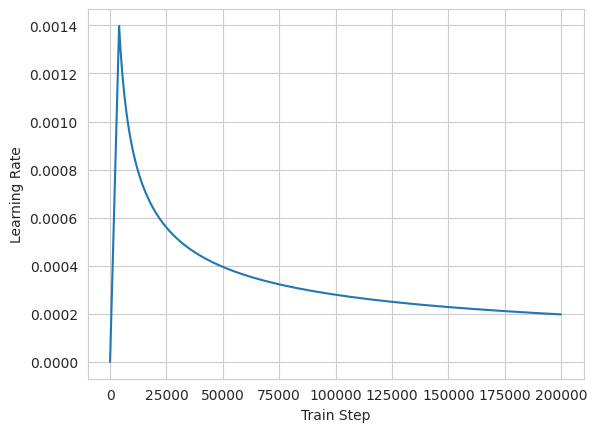

In [ ]:
sample_learning_rate = CustomSchedule(d_model=128)

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

In [ ]:
# clear backend
tf.keras.backend.clear_session()

learning_rate = CustomSchedule(D_MODEL)

In [ ]:

optimizer = tf.keras.optimizers.Adam(
     beta_1=0.9, beta_2=0.98, epsilon=1e-9
)



def accuracy(y_true, y_pred):
    # ensure labels have shape (batch_size, MAX_LENGTH - 1)
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
    return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)


# initialize and compile model within strategy scope
with strategy.scope():
    model = transformer(
        vocab_size=VOCAB_SIZE,
        num_layers=NUM_LAYERS,
        units=UNITS,
        d_model=D_MODEL,
        num_heads=NUM_HEADS,
        dropout=DROPOUT,
    )

    model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])

model.summary()

Model: "transformer"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, None)]       0           []                               
                                                                                                  
 dec_inputs (InputLayer)        [(None, None)]       0           []                               
                                                                                                  
 enc_padding_mask (Lambda)      (None, 1, 1, None)   0           ['inputs[0][0]']                 
                                                                                                  
 encoder (Functional)           (None, None, 256)    2783488     ['inputs[0][0]',                 
                                                                  'enc_padding_mask[0][0

In [ ]:
model.fit(dataset, epochs=EPOCHS)

Epoch 1/60
194/194 [==============================] - 50s 93ms/step - loss: 1.2620 - accuracy: 0.4735
Epoch 2/60
194/194 [==============================] - 8s 40ms/step - loss: 0.7858 - accuracy: 0.5226
Epoch 3/60
194/194 [==============================] - 6s 32ms/step - loss: 0.7257 - accuracy: 0.5259
Epoch 4/60
194/194 [==============================] - 6s 33ms/step - loss: 0.6784 - accuracy: 0.5290
Epoch 5/60
194/194 [==============================] - 6s 32ms/step - loss: 0.6354 - accuracy: 0.5321
Epoch 6/60
194/194 [==============================] - 7s 34ms/step - loss: 0.5911 - accuracy: 0.5365
Epoch 7/60
194/194 [==============================] - 6s 33ms/step - loss: 0.5510 - accuracy: 0.5405
Epoch 8/60
194/194 [==============================] - 7s 34ms/step - loss: 0.5105 - accuracy: 0.5453
Epoch 9/60
194/194 [==============================] - 7s 35ms/step - loss: 0.4762 - accuracy: 0.5501
Epoch 10/60
194/194 [==============================] - 6s 33ms/step - loss: 0.4433 - accur

In [ ]:
import pickle # save model
path = '/content/drive/My Drive/ColabNotebooks/data298/'

pickle.dump(model, open(path + 'Transformer_Haiyan.pkl', 'wb')) 

In [ ]:
filename = "Transformer_Chatbot_model_Haiyan.h5"
tf.keras.models.save_model(model, filepath=filename, include_optimizer=False)


In [ ]:
del model
tf.keras.backend.clear_session()

In [ ]:
model = tf.keras.models.load_model(
    filename,
    custom_objects={
        "PositionalEncoding": PositionalEncoding,
        "MultiHeadAttentionLayer": MultiHeadAttentionLayer,
    },
    compile=False,
)

In [ ]:
import tensorflow as tf
def evaluate(sentence):
    
    sentence = preprocess_sentence(sentence)
    sentence = tf.expand_dims(
        START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0
    )

    output = tf.expand_dims(START_TOKEN, 0)

    for i in range(MAX_LENGTH):
        predictions = model(inputs=[sentence, output], training=False)

        # select the last word from the seq_len dimension
        predictions = predictions[:, -1:, :]
        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

        # return the result if the predicted_id is equal to the end token
        if tf.equal(predicted_id, END_TOKEN[0]):
            break

        # concatenated the predicted_id to the output which is given to the decoder
        # as its input.
        output = tf.concat([output, predicted_id], axis=-1)

    return tf.squeeze(output, axis=0)


In [ ]:
def predict(sentence):
    prediction = evaluate(sentence)
    predicted_sentence = tokenizer.decode(
        [i for i in prediction if i < tokenizer.vocab_size]
    )
    return predicted_sentence

In [ ]:
predict("hey there")

'hello which drink can i get for you'

In [ ]:
predict('an iced hot chocolate')

'which size'

In [ ]:
predict('large')

'would you like anything else with that'

In [ ]:
predict("no thanks ")

'why not'

In [ ]:
predict("may i have a tea ?")

'he doesn t speak english'

In [ ]:
predict("Can drinking too much water be harmful")

'no not much'

In [ ]:
predict("what is a black russian?")

'i know'

In [ ]:
predict( 'what is the recommended daily caffeine intake	the recommended daily caffeine intake is	')

'how did you get so many'